# Improvement towards the reflexion computation from NoiseModelling 

<br><br>

---
### Imports

In [ ]:
import sys
sys.path += [".."] # os.path.abspath("../img-phy-sim")

import img_phy_sim as ips
from physgen_dataset import PhysGenDataset, get_image  # local module

import os
import random

import numpy as np
from torch.utils.data import DataLoader

d:\Programme\Anaconda\envs\img-phy-sim\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


---
### Data Loading

In [ ]:
data_path = "../datasets/physgen_train_raw/osm/"

img_src = data_path + random.sample(os.listdir(data_path), 1)[0]
# img_src = data_path + "input_physgen_2822.png"
should_scale = True
img_src

'../datasets/physgen_train_raw/osm/input_physgen_1502.png'

Or:

In [ ]:
# img_src = "./cache_img.png"
# ips.img.save(
#     get_image(mode='train', variation="sound_reflection", input_type="osm", output_type="complex_only", 
#               shuffle=True, return_output=False, as_numpy_array=True), 
#     img_src, should_scale=False)
# should_scale = False

# img_src

In [ ]:
input_, output_ = get_image(mode='train', variation="sound_reflection", input_type="osm", output_type="complex_only", 
               shuffle=False, return_output=True, as_numpy_array=True)

input_src = "./cache_img_1_input.png"
ips.img.save(input_, input_src, should_scale=False)

output_src = "./cache_img_1_output.png"
ips.img.save(output_, output_src, should_scale=False)

PhysGen (sound_reflection) Dataset for train got created


---
### Error Measurement Definition

In [ ]:
def calc_metrices(rays, noise_modelling_gt):
    # Create image from rays
    ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=True, 
                                        output_format="single_image", 
                                        img_background=None, ray_value=1.0, ray_thickness=1, 
                                        img_shape=(256, 256), dtype=float, standard_value=0,
                                        should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
    
    # Normalize both (if needed)

    # Thresholding to binary images

    # Recall, Precision, F1 Score

    

---
### Error Measurement Testing

In [ ]:
rays = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=input_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=10),
                                   wall_values=None, 
                                   wall_thickness=0,
                                   img_border_also_collide=False,
                                   reflexion_order=3,
                                   should_scale_rays=True,
                                   should_scale_img=False)
ips.ray_tracing.print_rays_info(rays)

d:\Programme\Anaconda\envs\img-phy-sim\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


Rays: 36
Beams: 135
    - Mean Beams per Ray: 3.8
        - Median: 4.0
        - Max: 4
        - Min: 1
        - Variance: 0.8
Reflexions: 99
    - Mean Reflexions per Ray: 2.8
        - Median: 3.0
        - Max: 3
        - Min: 0
        - Variance: 0.8
Points: 5039
    - Mean Points per Beam: 37.3
        - Median: 2.0
        - Max: 204
        - Min: 2
        - Variance: 49.2
    - Mean Point Values: 2.0
        - Median: 2.0
        - Variance: 0.0

Value-Range:
  x ∈ [0.11, 1.00]
  y ∈ [-0.00, 1.00]

Example:
Ray 1, beams: 4
Ray 1, beam 1, points: 38
Ray 1, beam 1, point 1: 2




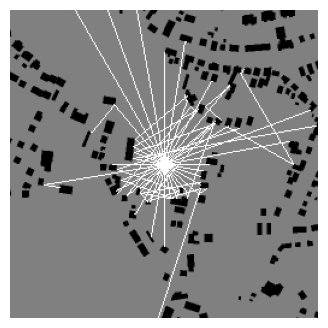

In [ ]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=input_, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)